 ##   Objective:
    
    The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

### 1) Aquire the dataset
        
       Use the Dataset, Employee.csv to perform data preprocessing

### 2) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3) Importing Dataset

In [2]:
df = pd.read_csv("Employee.csv")

In [3]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
df.shape

(148, 6)

### 4) Data Exploration Analysis

        Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
# Statistical Analysis of the dataset

df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [7]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [8]:
df.nunique()

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

#### Unique Values in each columns

In [9]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [10]:
df['Company'].value_counts()

Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

#### From the analysis its clear that there are similarities between TCS & Tata Consultancy Services, as well as Infosys Pvt Ltd & Infosys, and CTS & Cognizant. Therefore, change them to unique values.

In [11]:
df['Company'].replace("Infosys Pvt Lmt", "Infosys", inplace = True)
df['Company'].replace("Tata Consultancy Services","TCS", inplace = True)
df['Company'].replace("Congnizant", "CTS", inplace = True)

In [12]:
df['Company'].value_counts()

Company
TCS        55
Infosys    47
CTS        38
Name: count, dtype: int64

In [13]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [14]:
df['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [15]:
df['Salary'].unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

In [16]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [17]:
df['Country'].unique()

array(['India'], dtype=object)

In [18]:
df['Gender'].unique()

array([0, 1])

In [19]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [20]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


### Data Cleaning

        Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.
    ● Replace the value 0 in age as NaN
    ● Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

### 4) Finding Missing Data

In [21]:
df.isnull()

,Company,Age,Salary,Place,Country,Gender
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
143,False,False,False,False,False,False
144,False,False,False,False,False,False
145,False,False,False,False,False,False
146,False,False,False,False,False,False


In [22]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

#### The Analysis shows that null values are present in all columns except Country and Gender

In [23]:
# Number of duplicate rows

df.duplicated().sum()

4

In [24]:
# Duplicate rows

df[df.duplicated]


,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [25]:
# Remove Duplicate rows

df.drop_duplicates(inplace = True)

print("The data data without duplicate rows")
df

The data data without duplicate rows


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [26]:
df.shape

(144, 6)

In [27]:
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.9+ KB


### Outlier Detection 
        Find and remove the outlier using IQR (Inter Quartile Range) in Numerical columns.

##### Outlier Treatment in Age Column

In [29]:
Q1 = df['Age'].quantile(0.25)

Q1

22.0

In [30]:
Q3 = df['Age'].quantile(0.75)

Q3

37.5

In [31]:
IQR = Q3 - Q1

print("IQR : ", IQR)

IQR :  15.5


In [32]:
lower_bound = Q1 - (1.5 * IQR)

print("Lower_Bound : " , lower_bound)

Lower_Bound :  -1.25


In [33]:
upper_bound = Q3 + (1.5 * IQR)

upper_bound

60.75

#### From the analysis it shows the outliers are lies below lower bound or above the upper bound

In [34]:
print("Outliers detected using IQR Method : ")

outlier = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outlier

Outliers detected using IQR Method : 


,Company,Age,Salary,Place,Country,Gender


In [35]:
# The dataset without having outlier

without_outlier = df[(df['Age'] > lower_bound) & (df['Age'] <= upper_bound)]

without_outlier

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


#### No outliers are detected using IQR in Age.



### Histogram Plot for Age

<Axes: xlabel='Age', ylabel='Count'>

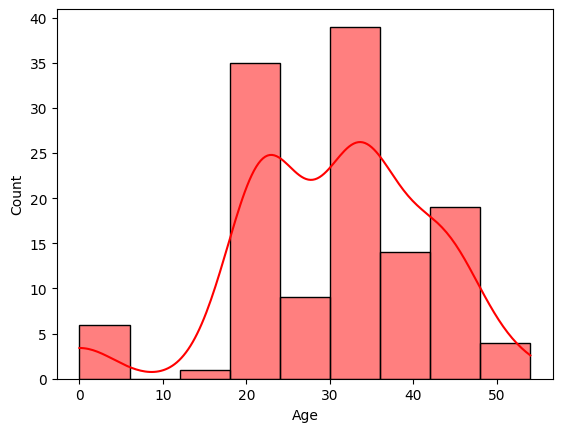

In [36]:
# Plot histogram
sns.histplot(df['Age'], kde = True, color = 'r')

#### BoxPlot for showing the employee age


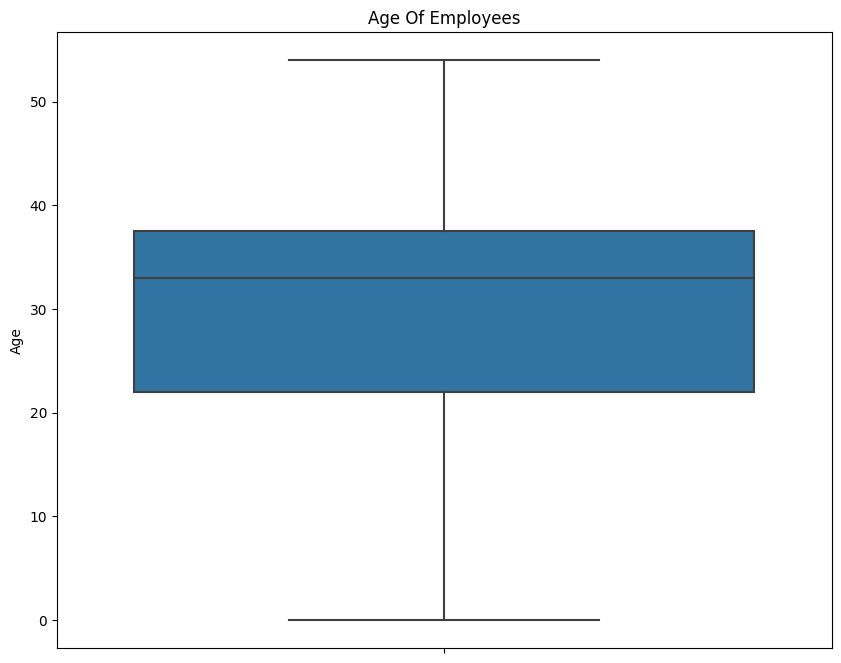

In [37]:
#Set the figure size
plt.figure(figsize = (10,8))

#Plot the boxplot
sns.boxplot(data = df, y = 'Age')

#Set the title
plt.title("Age Of Employees")

# Show the figure
plt.show()

##### Outlier Treatment in Salary Column

In [38]:
q1 = df['Salary'].quantile(0.25)

q1

3030.0

In [39]:
q3 = df['Salary'].quantile(0.75)

q3

8000.0

In [40]:
iqr = q3 - q1

print("Inter Quarter Range : ", iqr)

Inter Quarter Range :  4970.0


In [41]:
Lower_bound = q1 - 1.5 * iqr

print("Lower Bound : ", Lower_bound)

Lower Bound :  -4425.0


In [42]:
Upper_bound = q3 + 1.5 * iqr

print("Upper bound : ", Upper_bound)

Upper bound :  15455.0


In [43]:
print("Outliers detected using IQR Method : ")

outlier = df[(df['Salary'] < Lower_bound) | (df['Salary'] > Upper_bound)]
outlier

Outliers detected using IQR Method : 


,Company,Age,Salary,Place,Country,Gender


In [44]:
outlier = df[(df['Salary'] > Lower_bound) & (df['Salary'] < Upper_bound)]
outlier

,Company,Age,Salary,Place,Country,Gender
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


### Histogram Plot For salary

<Axes: xlabel='Salary', ylabel='Count'>

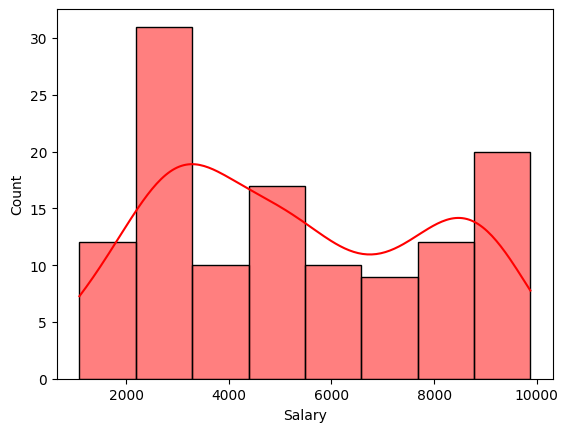

In [45]:
sns.histplot(df['Salary'], kde = True, color = 'r')

##### No outliers in the salary field.

### Box Plot for salary

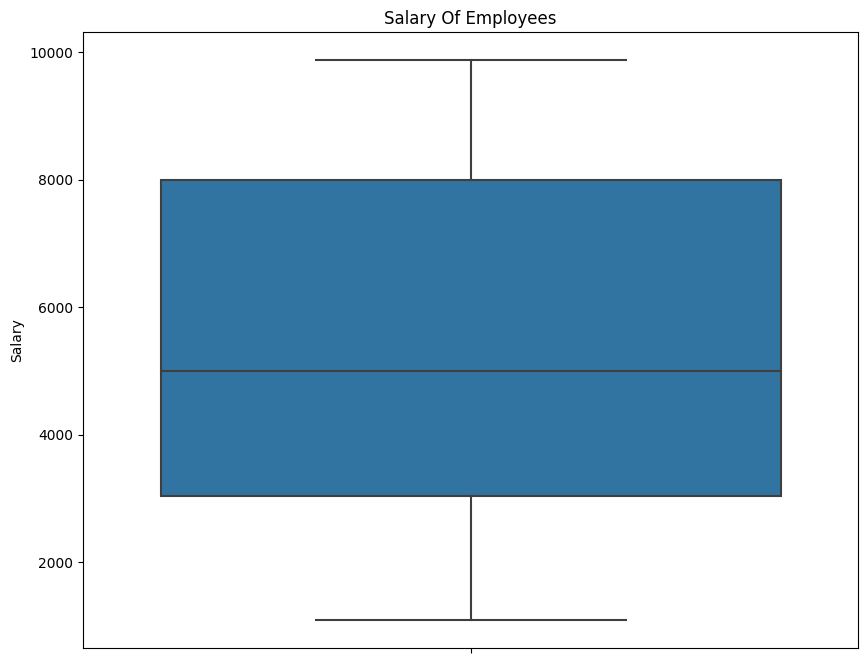

In [46]:
#Set the figure size
plt.figure(figsize = (10,8))

#Plot the boxplot
sns.boxplot(data = df, y = 'Salary')

#Set the title
plt.title("Salary Of Employees")

# Show the figure
plt.show()

#### Seperate numerical and categorical data from the dataset

In [47]:
print("Numerical Data")

df.select_dtypes(exclude = [object]).columns

Numerical Data


Index(['Age', 'Salary', 'Gender'], dtype='object')

In [48]:
print("Categorical Data")

df.select_dtypes(include = [object]).columns

Categorical Data


Index(['Company', 'Place', 'Country'], dtype='object')

#### Treat the missing Values in each column
        Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

#### The company is a categorical data so use the mode value to fill the null value.

In [49]:
df['Company'].mode()

0    TCS
Name: Company, dtype: object

In [50]:
df['Company'].replace(np.nan, "TCS", inplace = True)

In [51]:
df.isna().sum()

Company     0
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

#### Treat the Age column
        Here age is a numerical data so, use the mean value to remove the missing values

In [52]:
# Retrieve the data with age = 0

df[df['Age'] == 0]

,Company,Age,Salary,Place,Country,Gender
87,Infosys,0.0,3030.0,Calcutta,India,0
91,TCS,0.0,3045.0,Delhi,India,0
100,CTS,0.0,2034.0,Podicherry,India,0
106,TCS,0.0,9024.0,Chennai,India,1
110,Infosys,0.0,3234.0,Mumbai,India,0
120,CTS,0.0,1234.0,Calcutta,India,0


In [53]:
# Replace 0 with Nan

df['Age'].replace(0, np.nan,inplace = True)

In [54]:
df[df['Age'] == 0]

,Company,Age,Salary,Place,Country,Gender


In [55]:
df['Age'].isna().sum()

23

In [56]:
df['Age'].describe()

count    121.000000
mean      32.041322
std        8.989250
min       17.000000
25%       23.000000
50%       33.000000
75%       40.000000
max       54.000000
Name: Age, dtype: float64

In [57]:
mean_age = df['Age'].mean()

mean_age

32.04132231404959

In [58]:
# Replace the null value with mean

df['Age'].fillna(mean_age, inplace = True)

In [59]:
df.isna().sum()

Company     0
Age         0
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

#### Treat the missing values in Salry column
    Here the Salary is a numerical column and the mean value of the salary can be used to replace the null values.

In [60]:
df['Salary'].isna().sum()

23

In [61]:
df['Salary'].describe()

count     121.000000
mean     5283.471074
std      2585.373600
min      1089.000000
25%      3030.000000
50%      5000.000000
75%      8000.000000
max      9876.000000
Name: Salary, dtype: float64

In [62]:
print("Mean Salary : ")

mean_salary = df['Salary'].mean()

mean_salary

Mean Salary : 


5283.471074380165

In [63]:
# Replace the null value with the mean salary value
df['Salary'].fillna(mean_salary, inplace = True)

In [64]:
df.isna().sum()

Company     0
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64

#### Treat the Place appropriately
        Here the place column is a categorical data, so find the mode of to treat the missing values.   

In [65]:
df['Place'].mode()

0    Mumbai
Name: Place, dtype: object

In [66]:
df['Place'].replace(np.nan, 'Mumbai', inplace = True)

In [67]:
df.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

#### All the missing values are cleared from the dataset

In [68]:
df1 = pd.read_csv("Employee.csv")

In [69]:
df.describe()

,Age,Salary,Gender
count,144.000000,144.000000,144.000000
mean,32.041322,5283.471074,0.222222
std,8.234667,2368.350165,0.417191
min,17.000000,1089.000000,0.000000
25%,23.750000,3045.000000,0.000000
50%,32.041322,5283.471074,0.000000
75%,36.000000,7084.000000,0.000000
max,54.000000,9876.000000,1.000000


### Data Analysis:

        ● Filter the data with age >40 and salary<5000
        ● Plot the chart with age and salary
        ● Count the number of people from each place and represent  it visually

In [70]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.000000,Mumbai,India,0
140,TCS,33.0,9024.000000,Calcutta,India,1
141,Infosys,44.0,4034.000000,Delhi,India,1
142,TCS,33.0,5034.000000,Mumbai,India,1


In [71]:
# Filter the data with age > 40 and salary < 5000

data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

print("The Employees have age > 40 and salary < 5000 : " )

data

The Employees have age > 40 and salary < 5000 : 


,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
85,Infosys,41.0,3000.0,Delhi,India,0
92,Infosys,54.0,3184.0,Mumbai,India,0
103,Infosys,44.0,4034.0,Delhi,India,0


### Correlation 
        Measures the correlation between age and salary using:
        1) Scatter plot
        2) Heat map

In [72]:
data = df[['Age', 'Salary']]

data

,Age,Salary
0,20.0,5283.471074
1,30.0,5283.471074
2,35.0,2300.000000
3,40.0,3000.000000
4,23.0,4000.000000
...,...,...
139,22.0,8202.000000
140,33.0,9024.000000
141,44.0,4034.000000
142,33.0,5034.000000


In [73]:
correlation = data.corr()

correlation

,Age,Salary
Age,1.000000,-0.020299
Salary,-0.020299,1.000000


#### Here the correlation between age and salary is -0.020, which is approximately  equal to 0. ie, No linear relationship between age and salary

### HeatMap for Age and salary

<Axes: >

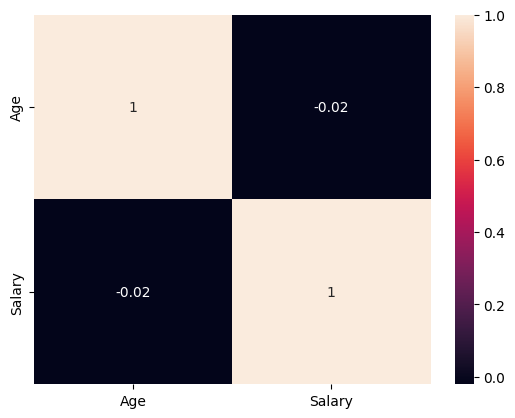

In [74]:
sns.heatmap(correlation, annot = True)

#### After plotting the heatmap correlation between age and salary is -0.020, which is approximately  equal to 0. ie, No linear relationship between age and salary

### Scatter Plot for Age and salary

Text(0.5, 1.0, 'Age v/s salary')

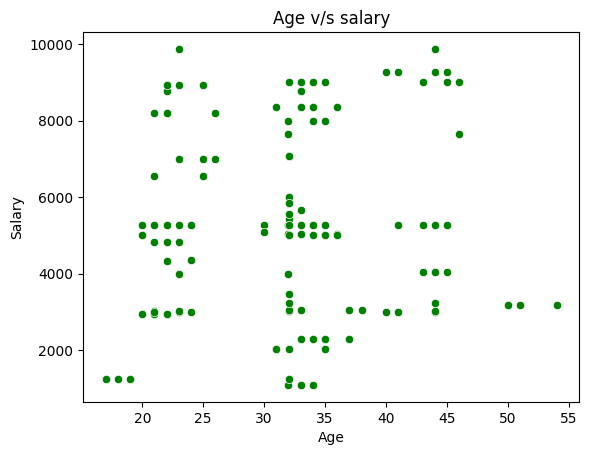

In [75]:
sns.scatterplot(data = df, x = 'Age', y = 'Salary', color = 'g')
plt.title("Age v/s salary")

####  Scatter plot shows that there is  no linear relationship between age and salary

### Count the number of people from each place and represent  it visually

In [76]:
df['Place'].value_counts()

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [77]:
# seperate places
place = df['Place'].value_counts().index

place

Index(['Mumbai', 'Calcutta', 'Chennai', 'Delhi', 'Cochin', 'Noida',
       'Hyderabad', 'Podicherry', 'Pune', 'Bhopal', 'Nagpur'],
      dtype='object', name='Place')

In [78]:
# Seperate employee count
count = df['Place'].value_counts().values

count

array([48, 32, 14, 14, 13,  8,  8,  3,  2,  1,  1])

### BarPlot For Place and Count

Text(0, 0.5, 'Count')

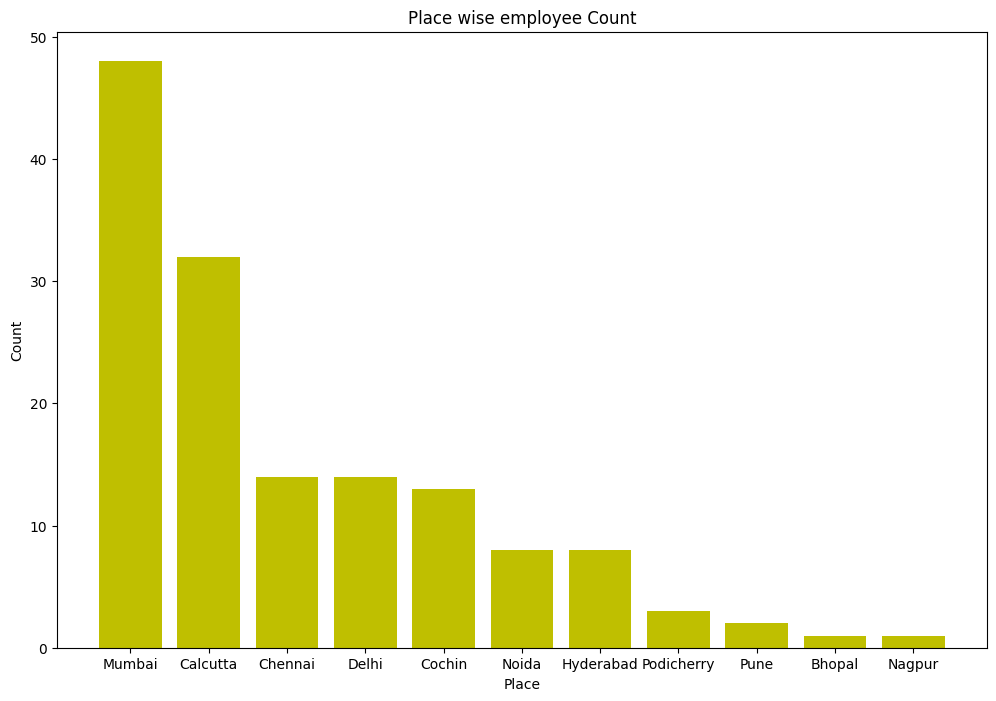

In [79]:
plt.figure(figsize = (12,8))
plt.bar(place, count, color = 'y')
plt.title("Place wise employee Count")
plt.xlabel("Place")
plt.ylabel("Count")

#### The barchart shows most of the employees are from Mumbai and least from Nagpur and Bhopal

### Count the number of employees in each gender and represent  it visually

In [80]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0


##### Here the gender represented as 0 and 1, so assume that 0 for 'Men' and '1' for 'Female'. Replace the value with 0 = Male and 1 = Female in the dataset

In [81]:
df['Gender'].replace(0, 'Male', inplace = True)

In [82]:
df['Gender'].replace(1, 'Female', inplace = True)

In [83]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [84]:
df['Gender'].value_counts()

Gender
Male      112
Female     32
Name: count, dtype: int64

In [85]:
Gender = ['Male', 'Female']

In [86]:
Count = df['Gender'].value_counts().values
Count

array([112,  32])

### Barplot for gender count

Text(0, 0.5, 'Count')

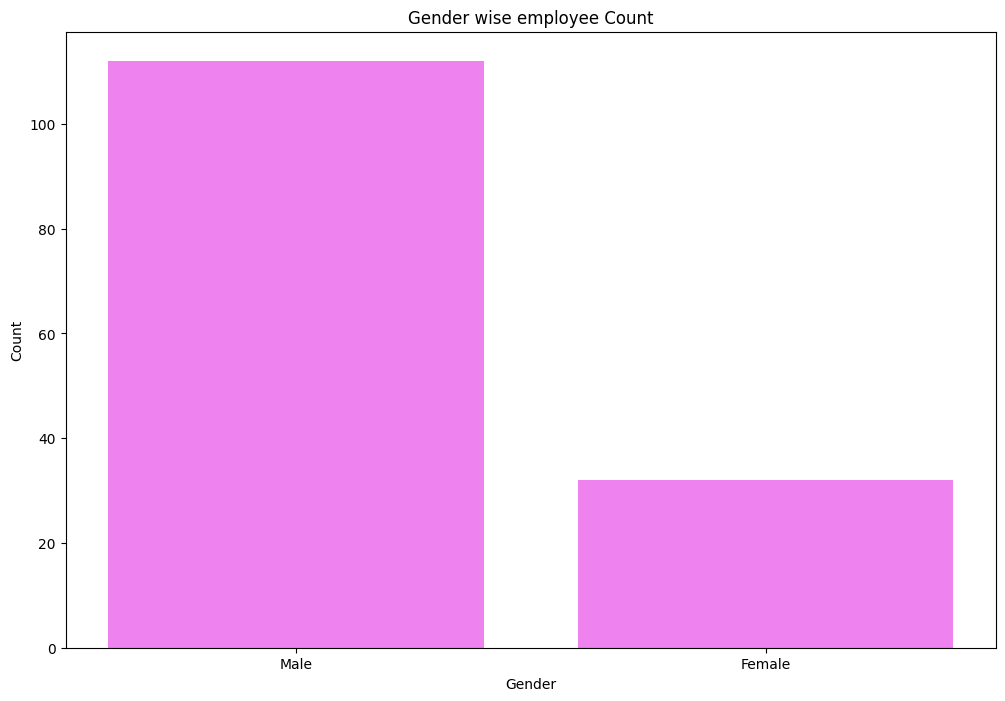

In [87]:
plt.figure(figsize = (12,8))
plt.bar(Gender, Count, color = 'violet')
plt.title("Gender wise employee Count")
plt.xlabel("Gender")
plt.ylabel("Count")

### 5) Encoding Categorical Data
    Data Encoding:
    Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machinelearning algorithms.
        

In [88]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,Male
1,Infosys,30.0,5283.471074,Mumbai,India,Male
2,TCS,35.0,2300.000000,Calcutta,India,Male
3,Infosys,40.0,3000.000000,Delhi,India,Male
4,TCS,23.0,4000.000000,Mumbai,India,Male
...,...,...,...,...,...,...
139,Infosys,22.0,8202.000000,Mumbai,India,Male
140,TCS,33.0,9024.000000,Calcutta,India,Female
141,Infosys,44.0,4034.000000,Delhi,India,Female
142,TCS,33.0,5034.000000,Mumbai,India,Female


In [89]:
df.describe()

,Age,Salary
count,144.000000,144.000000
mean,32.041322,5283.471074
std,8.234667,2368.350165
min,17.000000,1089.000000
25%,23.750000,3045.000000
50%,32.041322,5283.471074
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    object 
dtypes: float64(2), object(4)
memory usage: 6.9+ KB


##### Here 'company', 'Plance', 'Country' and 'Gender' are the categorical columns.

In [91]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS'], dtype=object)

In [92]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [93]:
df['Country'].unique()

array(['India'], dtype=object)

In [94]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### One Hot Encoding

### One hot encoding using pandas

In [95]:
# Create dummy variable for categorical columns such as 'company', 'Place', 'Country' and 'Gender' .

encode_company = pd.get_dummies(df['Company'],dtype = np.int32)

encode_company

,CTS,Infosys,TCS
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
139,0,1,0
140,0,0,1
141,0,1,0
142,0,0,1


In [96]:
encode_place = pd.get_dummies(df['Place'],dtype = np.int32)

In [97]:
encode_place

,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,0,0,0,0,1,0,0,0,0
140,0,1,0,0,0,0,0,0,0,0,0
141,0,0,0,0,1,0,0,0,0,0,0
142,0,0,0,0,0,0,1,0,0,0,0


In [98]:
encode_country = pd.get_dummies(df['Country'],dtype = np.int32)

encode_country

,India
0,1
1,1
2,1
3,1
4,1
...,...
139,1
140,1
141,1
142,1


In [99]:
encode_gender = pd.get_dummies(df['Gender'],dtype = np.int32)

encode_gender

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
139,0,1
140,1,0
141,1,0
142,1,0


In [100]:
# Concatinate original dataset with dummy dataset

df1 = pd.concat([df, encode_company, encode_place, encode_country, encode_gender], axis = 1)

df1

,Company,Age,Salary,Place,Country,Gender,CTS,Infosys,TCS,Bhopal,...,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune,India,Female,Male
0,TCS,20.0,5283.471074,Chennai,India,Male,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,Infosys,30.0,5283.471074,Mumbai,India,Male,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,TCS,35.0,2300.000000,Calcutta,India,Male,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,Infosys,40.0,3000.000000,Delhi,India,Male,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
4,TCS,23.0,4000.000000,Mumbai,India,Male,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.000000,Mumbai,India,Male,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
140,TCS,33.0,9024.000000,Calcutta,India,Female,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
141,Infosys,44.0,4034.000000,Delhi,India,Female,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
142,TCS,33.0,5034.000000,Mumbai,India,Female,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0


In [101]:
# Drop the company and place columns from the dataset 

df1.drop(['Company', 'Place','Country', 'Gender'], axis = 1, inplace = True)

In [102]:
df1

,Age,Salary,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune,India,Female,Male
0,20.0,5283.471074,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,30.0,5283.471074,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,35.0,2300.000000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,40.0,3000.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,23.0,4000.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
140,33.0,9024.000000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0
141,44.0,4034.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
142,33.0,5034.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [103]:
df1.columns

Index(['Age', 'Salary', 'CTS', 'Infosys', 'TCS', 'Bhopal', 'Calcutta',
       'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai', 'Nagpur', 'Noida',
       'Podicherry', 'Pune', 'India', 'Female', 'Male'],
      dtype='object')

### One Hot encoding using sci-Kit sklearn

In [104]:
# Import library

from sklearn.preprocessing import OneHotEncoder

In [105]:
# Create an object for onehotencoding

onehotencoder = OneHotEncoder()

onehotencoder 

OneHotEncoder()

In [106]:
cols_to_encode = ['Company', 'Place', 'Country', 'Gender']

new_encoded_cols_names = []

In [107]:
#Create a list of new columns names
for col in cols_to_encode:
    new_encoded_cols_names += [f"{category}" for category in df[col].unique().tolist()]

new_encoded_cols_names

['TCS',
 'Infosys',
 'CTS',
 'Chennai',
 'Mumbai',
 'Calcutta',
 'Delhi',
 'Podicherry',
 'Cochin',
 'Noida',
 'Hyderabad',
 'Bhopal',
 'Nagpur',
 'Pune',
 'India',
 'Male',
 'Female']

In [108]:
# Initialize and fit one hot encoder class from sklearn

one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = "ignore")

encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [109]:
# As the output of the above transformer would be a sparse matrix, we need to convet it back to pandas dataframe

df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)

df_encoded

,TCS,Infosys,CTS,Chennai,Mumbai,Calcutta,Delhi,Podicherry,Cochin,Noida,Hyderabad,Bhopal,Nagpur,Pune,India,Male,Female
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
140,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
141,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [110]:
# Concatinate the encoded data with df

df2 = pd.concat([df, df_encoded], axis = 1)

df2

,Company,Age,Salary,Place,Country,Gender,TCS,Infosys,CTS,Chennai,...,Podicherry,Cochin,Noida,Hyderabad,Bhopal,Nagpur,Pune,India,Male,Female
0,TCS,20.0,5283.471074,Chennai,India,Male,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Infosys,30.0,5283.471074,Mumbai,India,Male,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,TCS,35.0,2300.000000,Calcutta,India,Male,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Infosys,40.0,3000.000000,Delhi,India,Male,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,TCS,23.0,4000.000000,Mumbai,India,Male,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.000000,Mumbai,India,Male,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
140,TCS,33.0,9024.000000,Calcutta,India,Female,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
141,Infosys,44.0,4034.000000,Delhi,India,Female,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
142,TCS,33.0,5034.000000,Mumbai,India,Female,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [111]:
# Drop the categorical columns from df2
df2.drop(['Company', 'Place','Country', 'Gender'], axis = 1,inplace = True)

In [112]:
df2

,Age,Salary,TCS,Infosys,CTS,Chennai,Mumbai,Calcutta,Delhi,Podicherry,Cochin,Noida,Hyderabad,Bhopal,Nagpur,Pune,India,Male,Female
0,20.0,5283.471074,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,30.0,5283.471074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,35.0,2300.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,40.0,3000.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,23.0,4000.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
140,33.0,9024.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
141,44.0,4034.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
142,33.0,5034.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [113]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,Male
1,Infosys,30.0,5283.471074,Mumbai,India,Male
2,TCS,35.0,2300.000000,Calcutta,India,Male
3,Infosys,40.0,3000.000000,Delhi,India,Male
4,TCS,23.0,4000.000000,Mumbai,India,Male
...,...,...,...,...,...,...
139,Infosys,22.0,8202.000000,Mumbai,India,Male
140,TCS,33.0,9024.000000,Calcutta,India,Female
141,Infosys,44.0,4034.000000,Delhi,India,Female
142,TCS,33.0,5034.000000,Mumbai,India,Female


In [114]:
# Save the cleaned dataset df1 
df.to_csv('Cleaned_data.csv', index = False)

### Label Encoding

In [115]:
# Import Library

from sklearn.preprocessing import LabelEncoder

In [116]:
data = pd.read_csv("Cleaned_data.csv")

In [117]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,Male
1,Infosys,30.0,5283.471074,Mumbai,India,Male
2,TCS,35.0,2300.000000,Calcutta,India,Male
3,Infosys,40.0,3000.000000,Delhi,India,Male
4,TCS,23.0,4000.000000,Mumbai,India,Male
...,...,...,...,...,...,...
139,Infosys,22.0,8202.000000,Mumbai,India,Male
140,TCS,33.0,9024.000000,Calcutta,India,Female
141,Infosys,44.0,4034.000000,Delhi,India,Female
142,TCS,33.0,5034.000000,Mumbai,India,Female


In [118]:
# Create an object for labelencoder

label_encoder = LabelEncoder()

label_encoder

LabelEncoder()

In [119]:
for i in data[['Company', 'Place','Country', 'Gender']]:
    data[i] = label_encoder.fit_transform(data[i])

In [120]:
data

,Company,Age,Salary,Place,Country,Gender
0,2,20.0,5283.471074,2,0,1
1,1,30.0,5283.471074,6,0,1
2,2,35.0,2300.000000,1,0,1
3,1,40.0,3000.000000,4,0,1
4,2,23.0,4000.000000,6,0,1
...,...,...,...,...,...,...
139,1,22.0,8202.000000,6,0,1
140,2,33.0,9024.000000,1,0,0
141,1,44.0,4034.000000,4,0,0
142,2,33.0,5034.000000,6,0,0


### 6) Splitting Dataset
        split the dataset for training and testing.

In [121]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,Male
1,Infosys,30.0,5283.471074,Mumbai,India,Male
2,TCS,35.0,2300.000000,Calcutta,India,Male
3,Infosys,40.0,3000.000000,Delhi,India,Male
4,TCS,23.0,4000.000000,Mumbai,India,Male
...,...,...,...,...,...,...
139,Infosys,22.0,8202.000000,Mumbai,India,Male
140,TCS,33.0,9024.000000,Calcutta,India,Female
141,Infosys,44.0,4034.000000,Delhi,India,Female
142,TCS,33.0,5034.000000,Mumbai,India,Female


In [122]:
# Import Library

from sklearn.model_selection import train_test_split

##### In the dataset, assume that 'Salary' is the target variable (y) and other are the feature variables (X)

In [123]:
# split the data into features and target variables

print("Feature Variables : ")

X = df.drop('Salary', axis = 1)

X

Feature Variables : 


,Company,Age,Place,Country,Gender
0,TCS,20.0,Chennai,India,Male
1,Infosys,30.0,Mumbai,India,Male
2,TCS,35.0,Calcutta,India,Male
3,Infosys,40.0,Delhi,India,Male
4,TCS,23.0,Mumbai,India,Male
...,...,...,...,...,...
139,Infosys,22.0,Mumbai,India,Male
140,TCS,33.0,Calcutta,India,Female
141,Infosys,44.0,Delhi,India,Female
142,TCS,33.0,Mumbai,India,Female


In [124]:
print('Target Variable : ')

y = df[['Salary']]

y

Target Variable : 


,Salary
0,5283.471074
1,5283.471074
2,2300.000000
3,3000.000000
4,4000.000000
...,...
139,8202.000000
140,9024.000000
141,4034.000000
142,5034.000000


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [126]:
X_train

,Company,Age,Place,Country,Gender
124,TCS,33.000000,Mumbai,India,Female
31,CTS,20.000000,Mumbai,India,Male
98,CTS,44.000000,Podicherry,India,Female
36,TCS,32.000000,Noida,India,Male
16,Infosys,23.000000,Podicherry,India,Male
...,...,...,...,...,...
71,TCS,34.000000,Mumbai,India,Female
106,TCS,32.041322,Chennai,India,Female
14,Infosys,40.000000,Calcutta,India,Male
92,Infosys,54.000000,Mumbai,India,Male


In [127]:
X_test

,Company,Age,Place,Country,Gender
117,CTS,22.000000,Mumbai,India,Male
19,Infosys,32.000000,Mumbai,India,Male
82,CTS,22.000000,Pune,India,Male
97,TCS,33.000000,Delhi,India,Female
56,TCS,38.000000,Noida,India,Male
12,CTS,45.000000,Chennai,India,Male
132,CTS,40.000000,Calcutta,India,Female
65,CTS,31.000000,Hyderabad,India,Male
66,CTS,41.000000,Calcutta,India,Male
18,TCS,22.000000,Chennai,India,Male


In [128]:
y_train

,Salary
124,5654.000000
31,2934.000000
98,9284.000000
36,5283.471074
16,3030.000000
...,...
71,9024.000000
106,9024.000000
14,3000.000000
92,3184.000000


In [129]:
y_test

,Salary
117,5283.471074
19,5283.471074
82,5283.471074
97,8345.000000
56,3045.000000
12,5283.471074
132,9284.000000
65,2034.000000
66,5283.471074
18,5283.471074


### 7) Feature Scaling
        After the process of encoding, perform the scaling of the features using :
            * Standardscaler
            * Minmaxscaler

In [130]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,Male
1,Infosys,30.0,5283.471074,Mumbai,India,Male
2,TCS,35.0,2300.000000,Calcutta,India,Male
3,Infosys,40.0,3000.000000,Delhi,India,Male
4,TCS,23.0,4000.000000,Mumbai,India,Male
...,...,...,...,...,...,...
139,Infosys,22.0,8202.000000,Mumbai,India,Male
140,TCS,33.0,9024.000000,Calcutta,India,Female
141,Infosys,44.0,4034.000000,Delhi,India,Female
142,TCS,33.0,5034.000000,Mumbai,India,Female


##### Here the numerical columns are 'age' and 'salary'



In [131]:
data1 = df.iloc[:, [1,2]]
    
data1

,Age,Salary
0,20.0,5283.471074
1,30.0,5283.471074
2,35.0,2300.000000
3,40.0,3000.000000
4,23.0,4000.000000
...,...,...
139,22.0,8202.000000
140,33.0,9024.000000
141,44.0,4034.000000
142,33.0,5034.000000


### Standardscaler

In [132]:
#import library

from sklearn.preprocessing import StandardScaler

In [133]:
# Create a standardscaler object

scaler = StandardScaler()

In [134]:
scaler

StandardScaler()

In [135]:
# Fit the scaler on the data

scaler.fit(data1)

StandardScaler()

In [136]:
# Transform the data

scaled_data = scaler.transform(data1)

scaled_data

array([[-1.46737581,  0.        ],
       [-0.24875897,  0.        ],
       [ 0.36054944, -1.26412245],
       [ 0.96985786, -0.96752641],
       [-1.10179076, -0.54381778],
       [ 0.        , -0.12010914],
       [ 0.        ,  0.30359949],
       [-1.10179076,  0.72730813],
       [ 0.23868776,  1.15101676],
       [ 1.57916628,  1.57472539],
       [-1.10179076,  0.        ],
       [ 0.23868776, -1.77723361],
       [ 1.57916628,  0.        ],
       [-1.71109918, -1.71579586],
       [ 0.96985786, -0.96752641],
       [-1.10179076, -0.96752641],
       [-1.10179076, -0.95481515],
       [ 0.23868776, -0.12010914],
       [-1.22365245,  0.        ],
       [-0.00503561,  0.        ],
       [ 0.60427281, -0.94845952],
       [ 2.1884747 , -0.88956402],
       [-1.34551413, -0.19468186],
       [ 0.        ,  0.23368757],
       [ 0.        ,  0.76289965],
       [-1.10179076,  1.550574  ],
       [ 0.23868776,  1.29719624],
       [ 1.57916628,  1.69505864],
       [-1.10179076,

In [137]:
scaled_data.mean()

-5.396917480816733e-18

In [138]:
scaled_data.std()

1.0

##### Here the mean approximately equal to 0 and standard deviation approximately equal to 1. Means that the data scaled correctly

In [139]:
# Convert to dataframe 

standard_data = pd.DataFrame(scaled_data, columns = data1.columns)

standard_data

,Age,Salary
0,-1.467376,0.000000
1,-0.248759,0.000000
2,0.360549,-1.264122
3,0.969858,-0.967526
4,-1.101791,-0.543818
...,...,...
139,-1.223652,1.236606
140,0.116826,1.584894
141,1.457305,-0.529412
142,0.116826,-0.105703


### MinMax Scaling

In [140]:
data1

,Age,Salary
0,20.0,5283.471074
1,30.0,5283.471074
2,35.0,2300.000000
3,40.0,3000.000000
4,23.0,4000.000000
...,...,...
139,22.0,8202.000000
140,33.0,9024.000000
141,44.0,4034.000000
142,33.0,5034.000000


In [141]:
# import libraries

from sklearn.preprocessing import MinMaxScaler

In [142]:
# Create a scaler object

min_scaler = MinMaxScaler()

min_scaler

MinMaxScaler()

In [143]:
# Fit the scaler on the data

scaler.fit(data1)

StandardScaler()

In [144]:
# Transform the data
min_scaled_data = scaler.transform(data1)

min_scaled_data

array([[-1.46737581,  0.        ],
       [-0.24875897,  0.        ],
       [ 0.36054944, -1.26412245],
       [ 0.96985786, -0.96752641],
       [-1.10179076, -0.54381778],
       [ 0.        , -0.12010914],
       [ 0.        ,  0.30359949],
       [-1.10179076,  0.72730813],
       [ 0.23868776,  1.15101676],
       [ 1.57916628,  1.57472539],
       [-1.10179076,  0.        ],
       [ 0.23868776, -1.77723361],
       [ 1.57916628,  0.        ],
       [-1.71109918, -1.71579586],
       [ 0.96985786, -0.96752641],
       [-1.10179076, -0.96752641],
       [-1.10179076, -0.95481515],
       [ 0.23868776, -0.12010914],
       [-1.22365245,  0.        ],
       [-0.00503561,  0.        ],
       [ 0.60427281, -0.94845952],
       [ 2.1884747 , -0.88956402],
       [-1.34551413, -0.19468186],
       [ 0.        ,  0.23368757],
       [ 0.        ,  0.76289965],
       [-1.10179076,  1.550574  ],
       [ 0.23868776,  1.29719624],
       [ 1.57916628,  1.69505864],
       [-1.10179076,

In [145]:
min_scaled_data.min()

-1.8329608653940372

In [146]:
min_scaled_data.max()

2.6759214392043718

In [147]:
# Convert to dataframe

min_max_scaled_data = pd.DataFrame(min_scaled_data, columns = data1.columns)

min_max_scaled_data

,Age,Salary
0,-1.467376,0.000000
1,-0.248759,0.000000
2,0.360549,-1.264122
3,0.969858,-0.967526
4,-1.101791,-0.543818
...,...,...
139,-1.223652,1.236606
140,0.116826,1.584894
141,1.457305,-0.529412
142,0.116826,-0.105703
